Personal Loan Prediction



In [126]:
# This Project contains data of 5000 customers, the objective is to predict which customer will take personal Loan. 

# we will classify algorithms to differentiate clients who want to buy loans versus clients that will not


Attribute Information


In [127]:
# CCAvg: Avg spending on credit Cards per month 
# Education level: 1: UG, 2: Graduate, 3: Advance/Professional
# Mortgage: Value of House mortgage if any


Project Objective


In [128]:
# The client wants to indicate which customer for personal loans have the leading index mortagage predictions. our goal is to offer the best plans to encourage each costumer to take a personal loan.
 

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


Data Preparation

In [130]:
df_Bank = pd.read_csv('/Users/michaelsodeinde/Downloads/Bank_Personal_Loan_Modelling.csv')
df = df_Bank

Data Shape


In [131]:
df.shape


(5000, 14)

Data Columns and Rows

In [132]:
print('Number of Columns: {}'.format(df.shape[1]))
print('Number of Row: {}'.format(df.shape[0]))

Number of Columns: 14
Number of Row: 5000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observation:

We have 13 featured columns with 5000 data entries, all non-null. CCAvg dtype is a float feature, while the remaining columns are integers Numerical Categorical Features. 

Missing And Duplicate Values


In [134]:
print(df.isna().sum().sort_values(ascending =False))
print('duplicate values in Columns', df.duplicated().sum())


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
duplicate values in Columns 0


What we did here was to identify the missing values and also find if there is any duplicate values in the each column.



Data Columns

In [135]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Dropping Unnecssary columns 'ID', 'Zip Code', 'Online'

In [136]:
df.drop(columns = ['ID', 'ZIP Code'], axis = 1, inplace =True)

In [137]:
# how to check if the columns have been dropped 
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

Target Variables: Personal Loan

In [138]:
# we are creating counts of df for plotting categorical variables
loan = np.unique(df['Personal Loan'], return_counts =True)
print('loan = {}\n'.format(loan))

loan = (array([0, 1]), array([4520,  480]))



In [139]:
# now lets create fontdict for formatting figure text
axtitle_dict = {'family': 'serif', 'color': 'red', 'weight': 'bold', 'size': 16}
axlab_dict = {'family': 'serif', 'color': 'darkgreen', 'size': 14}

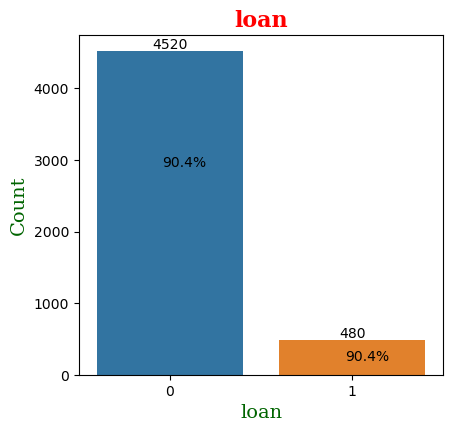

In [140]:
# lets display frequency distbrution for Personal Loan
fig =plt.figure(figsize =[16,15]);
ax1 = fig.add_subplot(3, 3, 2);
sns.barplot(x =list(loan[0]), y =list(loan[1]), ax=ax1);
ax1.text(0.2, 2900, '{}%' .format(str(round(loan[1][0]/sum(loan[1])*100,1))), ha ='right')
ax1.text(1.2, 200, '{}%' .format(str(round(loan[1][0]/sum(loan[1])*100,1))), ha ='right')
ax1.set_title('loan', fontdict=axtitle_dict);
ax1.set_xlabel('loan', fontdict=axlab_dict);
ax1.set_ylabel('Count', fontdict=axlab_dict);
ax1.bar_label(ax1.containers[0])
plt.show()

In [141]:
# after viewing this graph we have Identified tha majority of the Loans are 
# not opting personal loans 90.4%, while personal loans account for 9.6% of the data.


Filtering Numerical And Categorical Columns:


In [142]:
# we are separating the Numerical columns versus the Categorical Columns
categ_columns = []
for col in df.columns:
    if df[col].nunique()<=5:
        if col!= 'Personal Loan':
            categ_columns.append(col)
print('Categorical Numerical columns {}'.format(categ_columns))

Categorical Numerical columns ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [143]:
Num_cols = [col for col in df.columns if col not in categ_columns]
print('Numerical Columns {}'. format(Num_cols))
Num_cols.pop() # removing Personal Loans
Num_cols

Numerical Columns ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']


['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

EDA 

In [144]:
# now lets create counts of df for plotting categorical variables 
Online_account =np.unique(df['Online'], return_counts =True)
print('Online_account = {}\n'.format(Online_account))

Online_account = (array([0, 1]), array([2016, 2984]))



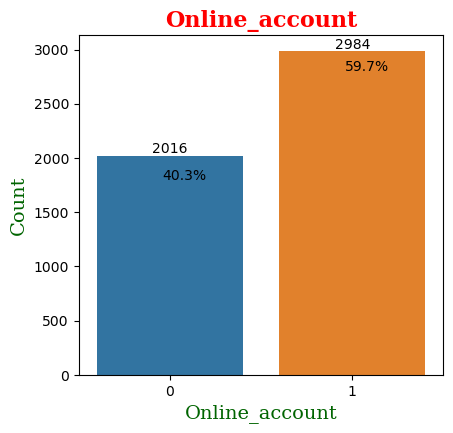

In [145]:
fig =plt.figure(figsize =[16,15]);
ax1 = fig.add_subplot(3, 3, 2);
sns.barplot(x =list(Online_account[0]), y =list(Online_account[1]), ax=ax1);
ax1.text(0.2, 1800, '{}%' .format(str(round(Online_account[1][0]/sum(Online_account[1])*100,1))),ha ='right')
ax1.text(1.2, 2800, '{}%' .format(str(round(Online_account[1][1]/sum(Online_account[1])*100,1))),ha ='right')
ax1.set_title('Online_account', fontdict=axtitle_dict);
ax1.set_xlabel('Online_account', fontdict=axlab_dict);
ax1.set_ylabel('Count', fontdict=axlab_dict);
ax1.bar_label(ax1.containers[0])
plt.show()

<Axes: xlabel='Personal Loan', ylabel='Income'>

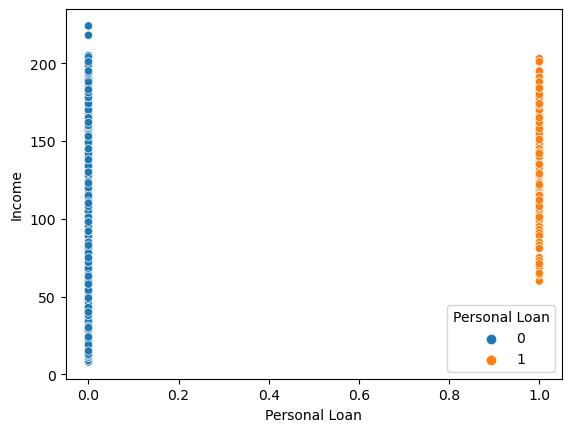

In [146]:
sns.scatterplot(x="Personal Loan",y="Income",data=df_Bank,hue="Personal Loan")

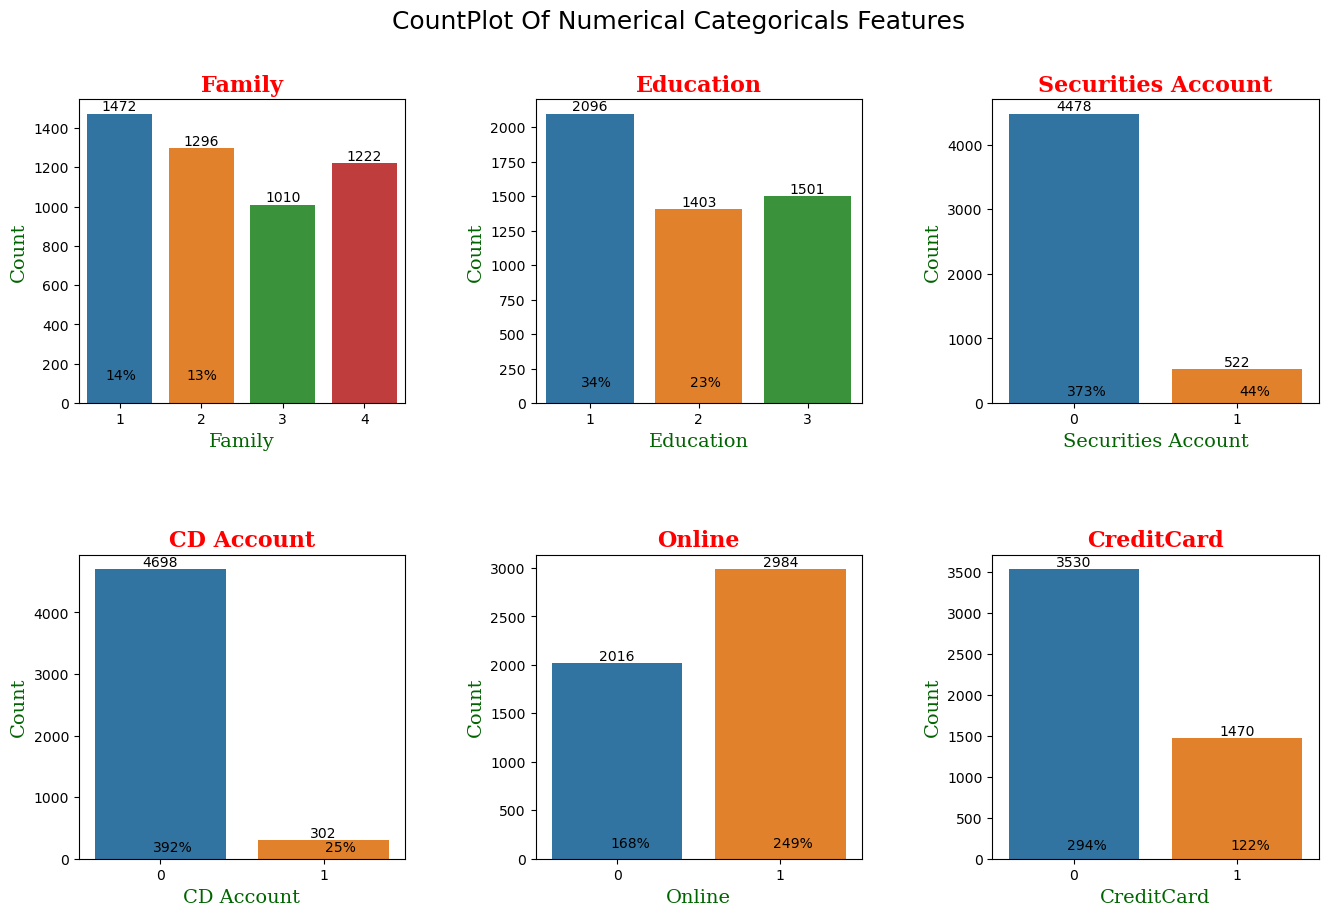

In [147]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('CountPlot Of Numerical Categoricals Features', fontsize=18, fontweight =16);
fig.subplots_adjust(top =0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i, columns in enumerate(categ_columns):
    input =np.unique(df[columns], return_counts =True)
    col ='input'
    ax1 = fig.add_subplot(3,3,i+1);
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y = list(eval(f'{col}[1]')))
    
    ax1.text(0.2, 120, '{}%'.format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[0]')*10,2)))),ha ='right')
    ax1.text(1.2, 120, '{}%'.format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[0]')*10,2)))), ha='right')
    ax1.set_title(f'{columns}', fontdict =axtitle_dict)
    ax1.set_xlabel(f'{columns}', fontdict=axlab_dict)
    ax1.set_ylabel('Count', fontdict =axlab_dict)
    ax1.bar_label(ax1.containers[0])

Skewed Distplot

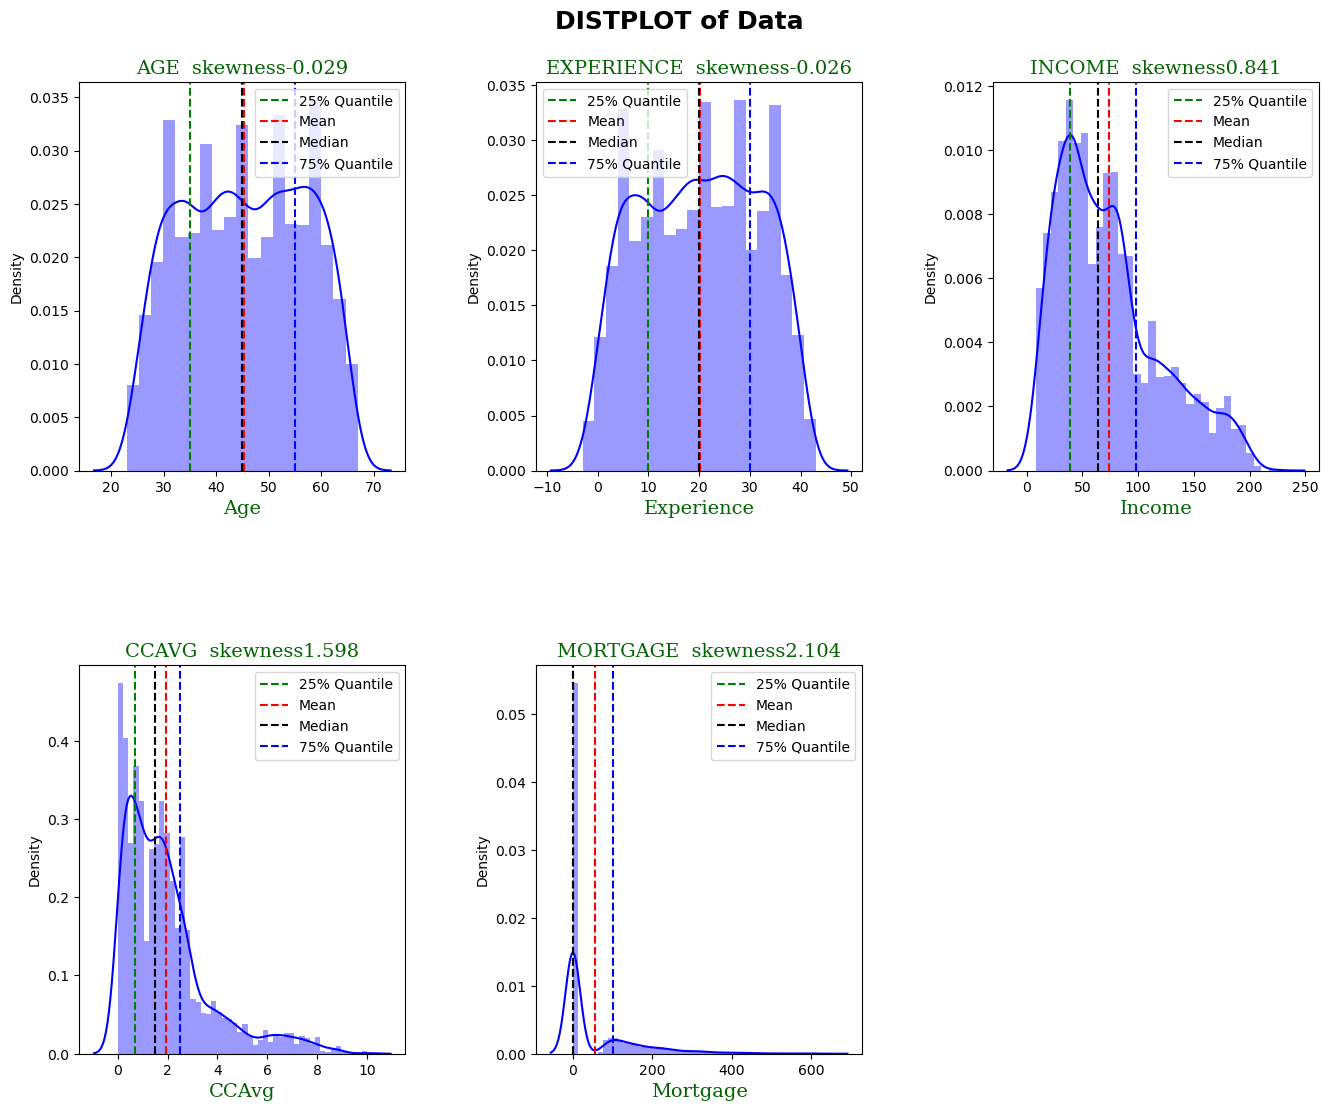

In [148]:
# we know will use Distplot to view the skewed graphs
fig =plt.figure(figsize=[16,12])
fig.suptitle('DISTPLOT of Data', fontsize = 18, fontweight ='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace =0.5, wspace= 0.4);
for i, col in enumerate(Num_cols):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.distplot(df[col], color = 'blue')
    ax.axvline(df[col].quantile(q=0.25), color='green', linestyle ='--', label ='25% Quantile')
    ax.axvline(df[col].mean(), color='red', linestyle ='--', label ='Mean')
    ax.axvline(df[col].median(), color='black', linestyle='--', label='Median')
    ax.axvline(df[col].quantile(q=0.75), color ='blue', linestyle='--', label ='75% Quantile')
    
    ax.set_xlabel(f'{col}', fontdict =axlab_dict)
    ax.set_title(f'{col.upper()}  skewness{round(df[col].skew(),3)}', fontdict= axlab_dict)
    ax.legend(fontsize=10)

In [149]:
dum_df =pd.get_dummies(df, columns =categ_columns)

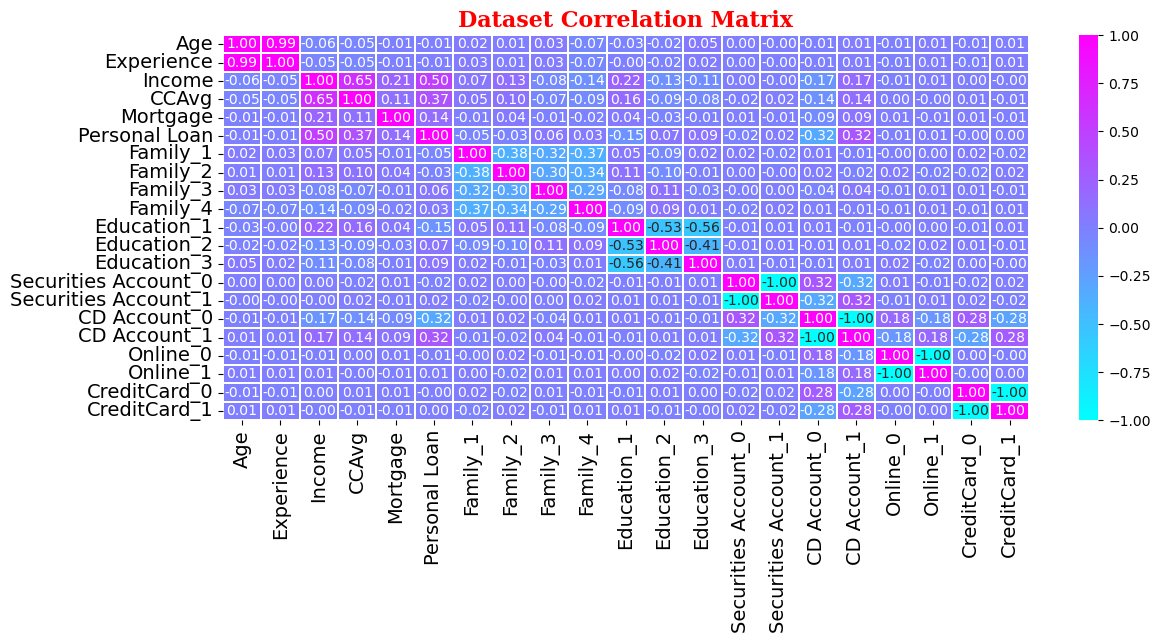

In [150]:
# plot correlation matrix heatmap
fig, ax =plt.subplots(figsize =[13,5])
sns.heatmap(dum_df.corr(), ax =ax, annot =True, linewidths=0.05, fmt='.2f', cmap='cool')
ax.tick_params(axis='both', which ='major', labelsize =14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show()

Outliers Detection

In [151]:
# check of outliers by applying the IQR method checking if values
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 -1.5 *IQR)) | (df_num > (Q3 + 1.5*IQR))).any()

Age           False
Experience    False
Income         True
CCAvg          True
Mortgage       True
dtype: bool

Income, CCAvg, Mortgage have Outliers

Visualization Of Outliers Using Box Plot

In [155]:
colours = ['darkgreen', 'darkred', 'coral', 'gold', 'blue', 'dodgerblue']

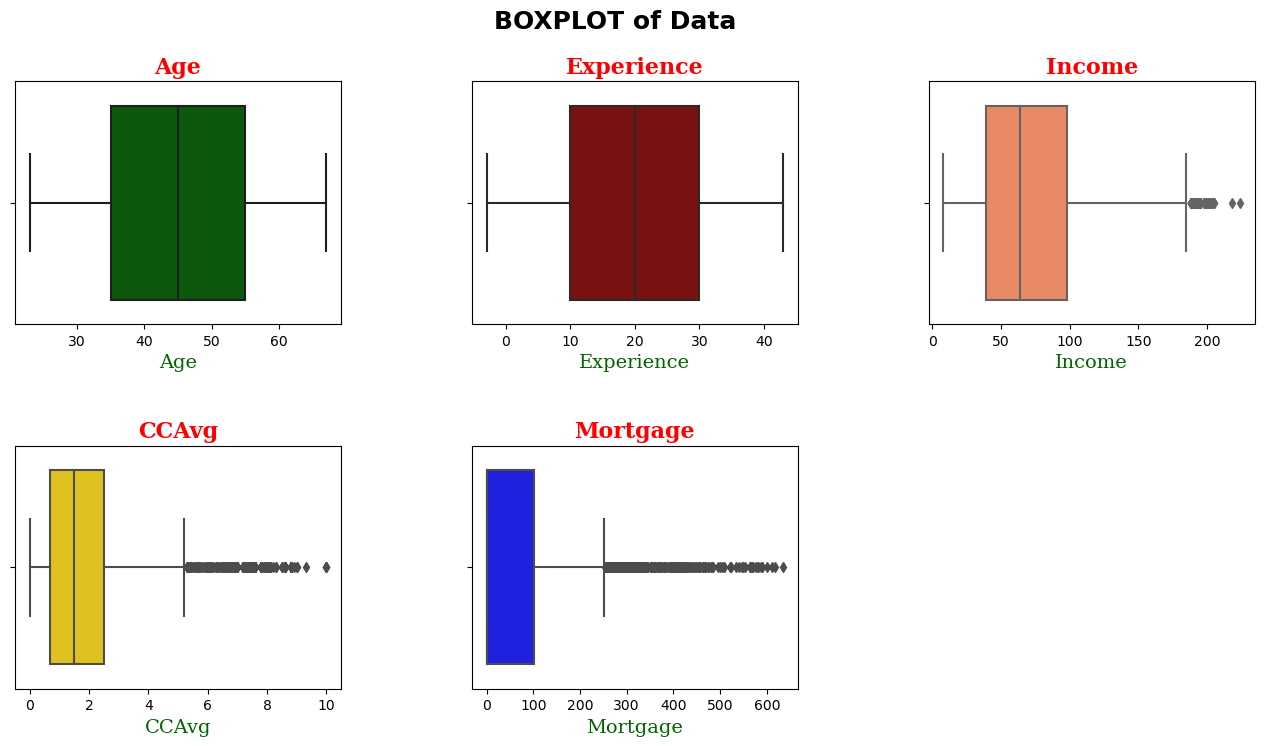

In [156]:
# create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize =[16,12])
fig.suptitle('BOXPLOT of Data', fontsize =18, fontweight ='bold')
fig.subplots_adjust(top =0.92);
fig.subplots_adjust(hspace =0.5, wspace =0.4);
for i, col in enumerate(Num_cols):
    ax1 = fig.add_subplot(3,3,i+1);
    ax1 = sns.boxplot(data =df, x=col, color=colours[i]);
    
    ax1.set_title(f'{col}', fontdict =axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict = axlab_dict)

Outliers Detection

In [158]:
# find IQR for budget columns
dict = {}
for col in ['Income', 'CCAvg', 'Mortgage']:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit' + '_' + col] = upper_limit
    dict['lower_limit' + '_' + col] = lower_limit

In [159]:
dict

{'upper_limit_Income': 186.5,
 'lower_limit_Income': -49.5,
 'upper_limit_CCAvg': 5.2,
 'lower_limit_CCAvg': -2.0,
 'upper_limit_Mortgage': 252.5,
 'lower_limit_Mortgage': -151.5}

In [160]:
for col in ['Income', 'CCAvg', 'Mortgage']:
    df[col] =np.where(
        df[col] > dict['upper_limit_' +col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict ['lower_limit_' + col],
            dict['lower_limit_' + col],
        df[col]
        )
    )

After Outliers Treatment 

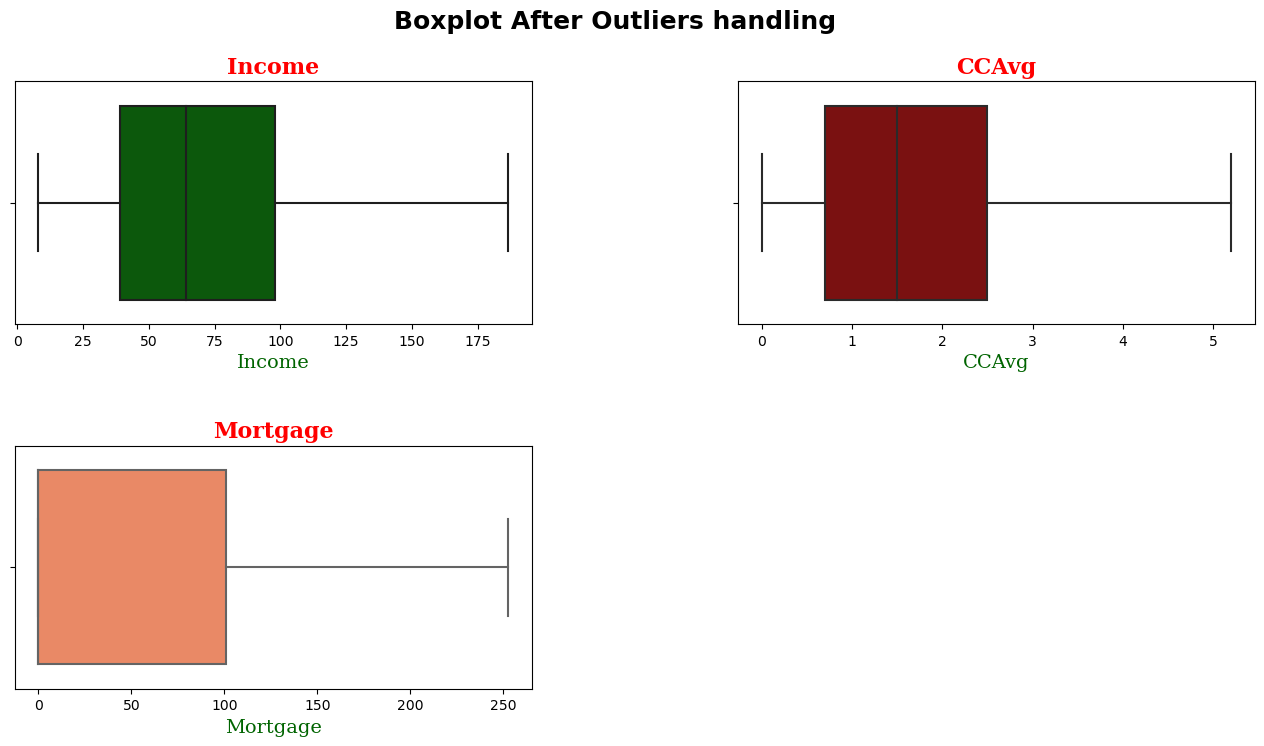

In [163]:
# Create figure with 3 x 3 grid of subplots
fig =plt.figure(figsize =[16,12])
fig.suptitle('Boxplot After Outliers handling', fontsize = 18, fontweight ='bold')
fig.subplots_adjust(top =0.92);
fig.subplots_adjust(hspace =0.5, wspace =0.4);
for i, col in enumerate ( ['Income', 'CCAvg', 'Mortgage']):
    ax1 = fig.add_subplot(3, 2, i+1);
    ax1 = sns.boxplot(data =df, x=col, color =colours[i]);
    
    ax1.set_title(f'{col}', fontdict =axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict = axlab_dict)